In [1]:
# Basic imports
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization, LSTM, SpatialDropout1D,Bidirectional, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2024-03-30 20:14:06.000093: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 20:14:06.000140: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 20:14:06.000178: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-30 20:14:06.009075: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = pd.read_csv(r"../unsw_dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv(r"../unsw_dataset/UNSW_NB15_testing-set.csv")


In [3]:
df = pd.concat([train,test])

In [4]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [6]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  

In [8]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

0 fully duplicate rows to remove


In [9]:
df_encoded = df.copy()

le = LabelEncoder()

df_encoded['attack_cat'] = le.fit_transform(df['attack_cat'])

X = df_encoded.drop('attack_cat', axis=1)
y = df_encoded['attack_cat']

In [10]:
X = df.drop('attack_cat', axis=1)
y = df['attack_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
print(y_train.value_counts())

attack_cat
Normal            74400
Generic           47097
Exploits          35620
Fuzzers           19397
DoS               13082
Reconnaissance    11189
Analysis           2142
Backdoor           1863
Shellcode          1209
Worms               139
Name: count, dtype: int64


In [10]:
# One-hot encode categorical features
categorical_columns = ['proto', 'service', 'state']  
X = pd.get_dummies(df.drop('attack_cat', axis=1), columns=categorical_columns)
y = df['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for Conv1D 
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.values.reshape(-1, 1))


In [12]:
# One-hot encode categorical features
categorical_columns = ['proto', 'service', 'state']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

X = df_encoded.drop(['attack_cat'], axis=1)
y = df_encoded['attack_cat']

# Encode the target variable for multi-class classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_encoded_one_hot = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_one_hot, test_size=0.2, random_state=42)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

## LSTM without Finetuning

In [ ]:
nvidia-smi | grep 'python' | awk '{ print $3 }' | xargs -n1 kill -9


In [11]:
import tensorflow as tf

# Specify the GPU to use
gpu_device = '/device:GPU:1'

In [14]:
X_train_scaled.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [12]:
with tf.device(gpu_device):

    # Build the LSTM model for multi-class classification
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(units=len(df['attack_cat'].unique()), activation='softmax'))  

        # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

RuntimeError: Bad StatusOr access: INTERNAL: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 84974239744

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.2f}%".format(test_loss * 100))

   1/1611 [..............................] - ETA: 46s - loss: 0.5037 - accuracy: 0.8438

1611/1611 [==============================] - 2s 1ms/step - loss: 0.3848 - accuracy: 0.8550
Test Accuracy: 85.50%
Test Loss: 38.48%


In [16]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_original = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

class_names = np.unique(y_test_original)

# Classification report
report = classification_report(y_test_original, y_pred_original, target_names=class_names)
print(report)


1611/1611 [==============================] - 2s 983us/step


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.71      0.12      0.21       538
      Backdoor       0.00      0.00      0.00       471
           DoS       0.29      0.05      0.08      3293
      Exploits       0.60      0.91      0.72      8853
       Fuzzers       0.81      0.81      0.81      4742
       Generic       1.00      0.98      0.99     11849
        Normal       1.00      1.00      1.00     18675
Reconnaissance       0.71      0.62      0.66      2770
     Shellcode       0.58      0.02      0.04       318
         Worms       0.00      0.00      0.00        26

      accuracy                           0.85     51535
     macro avg       0.57      0.45      0.45     51535
  weighted avg       0.84      0.85      0.83     51535



/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
class_names = label_encoder.inverse_transform(y_encoded)


In [17]:
class_names = label_encoder.classes_


In [18]:
class_names

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

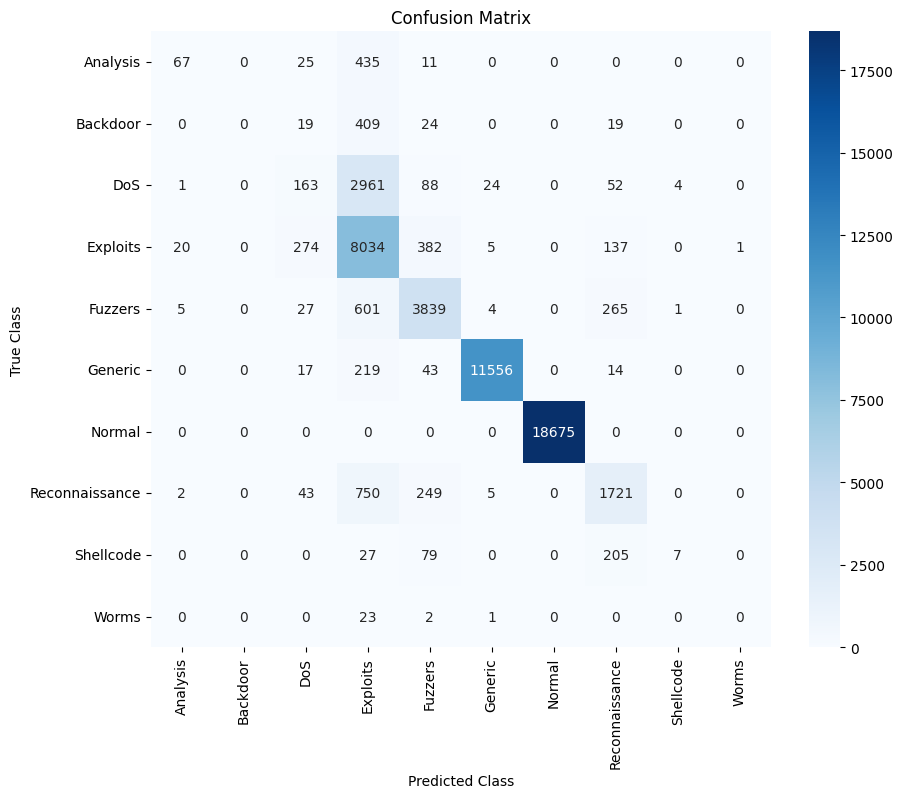

In [19]:
y_true_indices = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(y_pred, axis=1)




# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_indices, y_pred_indices)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## LSTM with Finetuning

In [20]:
lstm_with_finetuning = Sequential()
lstm_with_finetuning.add(LSTM(units=100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
lstm_with_finetuning.add(Dropout(0.2))
lstm_with_finetuning.add(LSTM(units=50))
lstm_with_finetuning.add(Dropout(0.2))
lstm_with_finetuning.add(Dense(units=len(df['attack_cat'].unique()), activation='softmax'))

# Compile the model
lstm_with_finetuning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model with callbacks
lstm_with_finetuning.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
2577/2577 [==============================] - 19s 7ms/step - loss: 0.5353 - accuracy: 0.8150 - val_loss: 0.4202 - val_accuracy: 0.8476 - lr: 0.0010
Epoch 2/10
2577/2577 [==============================] - 16s 6ms/step - loss: 0.4238 - accuracy: 0.8465 - val_loss: 0.4062 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 3/10
2577/2577 [==============================] - 16s 6ms/step - loss: 0.4106 - accuracy: 0.8503 - val_loss: 0.3894 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 4/10
2577/2577 [==============================] - 16s 6ms/step - loss: 0.4024 - accuracy: 0.8520 - val_loss: 0.3883 - val_accuracy: 0.8543 - lr: 0.0010
Epoch 5/10
2577/2577 [==============================] - 16s 6ms/step - loss: 0.3966 - accuracy: 0.8532 - val_loss: 0.3815 - val_accuracy: 0.8564 - lr: 0.0010
Epoch 6/10
2577/2577 [==============================] - 16s 6ms/step - loss: 0.3909 - accuracy: 0.8547 - val_loss: 0.3761 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 7/10
2577/2577 [==============================

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = lstm_with_finetuning.evaluate(X_test_reshaped, y_test)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.2f}%".format(test_loss * 100))

1611/1611 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8596
Test Accuracy: 85.96%
Test Loss: 36.50%


In [22]:
y_pred = lstm_with_finetuning.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_original = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

class_names = np.unique(y_test_original)

# Classification report
report = classification_report(y_test_original, y_pred_original, target_names=class_names)
print(report)

1611/1611 [==============================] - 4s 2ms/step


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.70      0.11      0.20       538
      Backdoor       1.00      0.00      0.00       471
           DoS       0.36      0.03      0.05      3293
      Exploits       0.60      0.88      0.72      8853
       Fuzzers       0.84      0.82      0.83      4742
       Generic       1.00      0.97      0.99     11849
        Normal       1.00      1.00      1.00     18675
Reconnaissance       0.67      0.77      0.72      2770
     Shellcode       0.59      0.20      0.30       318
         Worms       0.00      0.00      0.00        26

      accuracy                           0.86     51535
     macro avg       0.68      0.48      0.48     51535
  weighted avg       0.85      0.86      0.83     51535



/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test_original, y_pred_original, average='weighted')
recall = recall_score(y_test_original, y_pred_original, average='weighted')
f1 = f1_score(y_test_original, y_pred_original, average='weighted')
accuracy = accuracy_score(y_test_original, y_pred_original)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.8516120285696012
Recall: 0.8596293780925585
F1 Score: 0.834070683683515
Accuracy: 0.8596293780925585


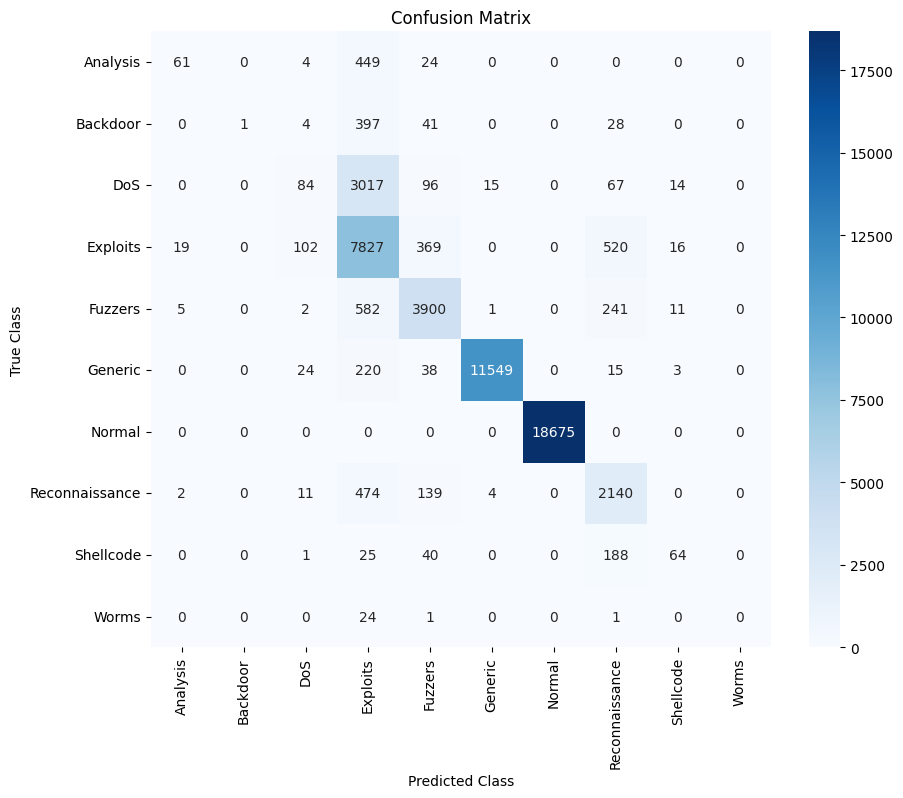

In [24]:
y_true_indices = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(y_pred, axis=1)

class_names = np.unique(y_test_original)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_indices, y_pred_indices)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()